<a href="https://colab.research.google.com/github/Kristian-Abad/Netflix-Movies-Project/blob/main/Netflix_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [4]:
import numpy as np
import pandas as pd

# Importing the data

The data comes from [this Kaggle dataset.](https://www.kaggle.com/datasets/amjaads/netflix-movies?resource=download)

In [5]:
data = pd.read_csv('Netflix_movies.csv')

# Exploring our data

In [6]:
data.head()

,Unnamed: 0,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,1,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,"May 21, 2020"
1,4,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,5,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,7,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,9,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"


In [7]:
data.loc[:,'Unnamed: 0']

0          1
1          4
2          5
3          7
4          9
        ... 
3318    3892
3319    3893
3320    3894
3321    3895
3322    3896
Name: Unnamed: 0, Length: 3323, dtype: int64

We're going to need to deal with this column later.

In [8]:
data.shape

(3323, 10)

Okay so we're dealing with a dataframe with 3,323 records across 10 variables.

In [9]:
data.isna().any()

Unnamed: 0          False
movie_name          False
Duration            False
year                False
genre               False
director            False
actors              False
country             False
rating              False
enter_in_netflix    False
dtype: bool

Looks like we are fortunate enough to not have any missing values.

In [10]:
data = data.rename(columns={"Unnamed: 0" : "index"})
data.head()

,index,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,1,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,"May 21, 2020"
1,4,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,5,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,7,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,9,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"


Since the now index column is non-monotonic let's just drop it.

In [11]:
data = data.drop(columns='index')
# Verifying we have dropped the 'index' column
data.head()

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
0,#FriendButMarried,102,2018,"Dramas, International Movies, Romantic Movies",Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,7.0,"May 21, 2020"
1,#Selfie,125,2014,"Comedies, Dramas, International Movies",Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,#Selfie 69,119,2016,"Comedies, Dramas, International Movies",Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,10 Days in Sun City,87,2017,"Comedies, International Movies, Romantic Movies",Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"


In [12]:
data[data.genre == 'Comedies'].head()

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
61,A Bad Moms Christmas,104,2017,Comedies,"Jon Lucas, Scott Moore","Mila Kunis, Kristen Bell, Kathryn Hahn, Susan ...","United States, China",5.6,"February 14, 2020"
77,A Futile and Stupid Gesture,102,2018,Comedies,David Wain,"Will Forte, Domhnall Gleeson, Martin Mull, Joe...",United States,6.8,"January 26, 2018"
107,A Thousand Words,92,2012,Comedies,Brian Robbins,"Eddie Murphy, Kerry Washington, Cliff Curtis, ...",United States,5.9,"July 1, 2020"
149,Adventures in Public School,86,2018,Comedies,Kyle Rideout,"Daniel Doheny, Judy Greer, Siobhan Williams, R...","Canada, United States",5.8,"August 15, 2018"


I want to compare the count of movies that are comedies (or contain comedy elements), horror (or contain horror elements), and possibly both as indicated by the 'genre' column by year entered in Netflix. Here's how I would initially like to tackle this problem:


*   Create a subset of the data containing only comedies.
*   Create a subset of the data containing only horror.
*   Create a subset of the data containing both.
*   Combine the three subsets
*   Group by year entered in netflix and genre. Then count, sum as a new column called count
*   Export for visualization in Tableau







Let's find all the movies that at least 'Comedies' in the genre column. The [reference](https://thecodingbot.com/check-if-a-column-contains-specific-string-in-a-pandas-dataframe/) for the function used.

In [ ]:
# Create a boolean filter of the records that contain 'Comedies' in the 'genre column'
comedies_filter = data.genre.str.contains('Comedies')

# Create a temporary subset of the data using the filter above
temp_subset = data[comedies_filter]

# Use the temporary subset to now filter out the "Horror" movies
data_comedies = temp_subset[~temp_subset.genre.str.contains('Horror')]

In [ ]:
# Verifying that we should get no entries that have 'Horror' in the genre
data_comedies[data_comedies.genre.str.contains('Horror')]

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix


Likewise we can do the same operations for our other subsets of the data:

In [ ]:
# Create a boolean filter of the records that contain 'Horror' in the 'genre column'
horror_filter = data.genre.str.contains('Horror')

# Create a temporary subset of the data using the filter above
temp_subset_2 = data[horror_filter]

# Use the temporary subset to now filter out the "Horror" movies
data_horror = temp_subset_2[~temp_subset_2.genre.str.contains('Comedies')]

In [ ]:
data_horror.head()

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
9,122,95,2019,"Horror Movies, International Movies",Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,7.1,"June 1, 2020"
10,13 Cameras,90,2015,"Horror Movies, Independent Movies, Thrillers",Victor Zarcoff,"PJ McCabe, Brianne Moncrief, Sarah Baldwin, Ji...",United States,5.1,"August 13, 2016"
11,13 Sins,93,2014,"Horror Movies, Thrillers",Daniel Stamm,"Mark Webber, Rutina Wesley, Devon Graye, Tom B...",United States,6.3,"January 13, 2019"
13,14 Cameras,89,2018,"Horror Movies, Thrillers","Scott Hussion, Seth Fuller","Neville Archambault, Amber Midthunder, Brytnee...",United States,4.5,"October 27, 2018"
17,1920,143,2008,"Horror Movies, International Movies, Thrillers",Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,6.4,"December 15, 2017"


In [ ]:
# Verifying that we should get no entries that have 'Horror' in the genre
data_horror[data_horror.genre.str.contains('Comedies')]

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix


In [ ]:
# Create a boolean filter of the records that contain both 'Comedies' and 'Horror' in the 'genre column'
ch_filter = data.genre.str.contains('Horror') & data.genre.str.contains('Comedies')

# Create a temporary subset of the data using the filter above
data_ch = data[ch_filter]
data_ch.head()

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
81,A Haunted House,86,2013,"Comedies, Horror Movies",Michael Tiddes,"Marlon Wayans, Essence Atkins, Cedric the Ente...",United States,5.0,"February 21, 2020"
1047,Girls With Balls,77,2019,"Comedies, Horror Movies, International Movies",Olivier Afonso,"Victor Artus Solaro, Manon Azem, Louise Blachè...","France, Belgium",3.8,"July 26, 2019"
1112,Hantu Kak Limah,110,2018,"Comedies, Horror Movies, International Movies",Mamat Khalid,"Awie, Arab Khalid, Sharwani Ns, Tj Isa, Delima...",Malaysia,6.3,"January 31, 2019"
1135,He Never Died,97,2015,"Comedies, Horror Movies",Jason Krawczyk,"Henry Rollins, Booboo Stewart, Kate Greenhouse...",Canada,6.4,"March 18, 2016"
1173,Holidays,106,2016,"Comedies, Horror Movies","Anthony Scott Burns, Nicholas McCarthy, Adam E...","Madeleine Coghlan, Savannah Kennick, Ruth Brad...",United States,5.1,"July 15, 2016"


Taking a quick peak into the shape of our subsets:

In [ ]:
print('Comedies: ', data_comedies.shape,
      '\nHorror: ', data_horror.shape,'\n'
      'Comedies and Horror: ',data_ch.shape)

Comedies:  (987, 9) 
Horror:  (196, 9) 
Comedies and Horror:  (23, 9)


Let's change up the genres for each of the subsets.

In [ ]:
data_comedies.loc[:,'genre'] = 'Comedies'
data_horror.loc[:,'genre'] = 'Horror'
data_ch.loc[:,'genre'] = 'Both'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Alright now let's combine all the subsets.

In [ ]:
# Combine all the subsets into a new dataframe
data_complete_ch = pd.concat([data_comedies,data_horror,data_ch])
data_complete_ch.head()

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
1,#Selfie,125,2014,Comedies,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,"June 1, 2019"
2,#Selfie 69,119,2016,Comedies,Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,"June 1, 2019"
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,"September 8, 2017"
4,10 Days in Sun City,87,2017,Comedies,Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,"October 18, 2019"
5,10 jours en or,97,2012,Comedies,Nicolas Brossette,"Franck Dubosc, Claude Rich, Marie Kremer, Math...",France,5.8,"July 1, 2017"


Let's do some finishing touches on the data by only getting the year that movies were added to Netflix and only

In [ ]:
data_complete_ch.loc[:,'enter_in_netflix'] = pd.DatetimeIndex(data_complete_ch.enter_in_netflix).year
data_complete_ch.head()

,movie_name,Duration,year,genre,director,actors,country,rating,enter_in_netflix
1,#Selfie,125,2014,Comedies,Cristina Jacob,"Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...",Romania,6.1,2019
2,#Selfie 69,119,2016,Comedies,Cristina Jacob,"Maia Morgenstern, Olimpia Melinte, Crina Semci...",Romania,6.3,2019
3,#realityhigh,99,2017,Comedies,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,5.2,2017
4,10 Days in Sun City,87,2017,Comedies,Adze Ugah,"Ayo Makun, Adesua Etomi, Richard Mofe-Damijo, ...",South Africa,5.3,2019
5,10 jours en or,97,2012,Comedies,Nicolas Brossette,"Franck Dubosc, Claude Rich, Marie Kremer, Math...",France,5.8,2017


In [ ]:
data_complete_ch = data_complete_ch.drop(columns = ['director','actors']).rename(columns={'enter_in_netflix':'netflix_year'})
data_complete_ch.head()

,movie_name,Duration,year,genre,country,rating,netflix_year
1,#Selfie,125,2014,Comedies,Romania,6.1,2019
2,#Selfie 69,119,2016,Comedies,Romania,6.3,2019
3,#realityhigh,99,2017,Comedies,United States,5.2,2017
4,10 Days in Sun City,87,2017,Comedies,South Africa,5.3,2019
5,10 jours en or,97,2012,Comedies,France,5.8,2017



To do:
*   Aggregate data by genre, netflix year
*   Make a new column called count that gives the count of movies for each genre for each year
*   Make a new column called avg rating that gives the average rating for each genre for each year
*   Export to csv



In [ ]:
data_complete_ch_mod = data_complete_ch.copy()
data_complete_ch_mod['count'] = data_complete_ch_mod.groupby(['genre','netflix_year'])['genre'].transform('count')
data_complete_ch_mod

,movie_name,Duration,year,genre,country,rating,netflix_year,count
1,#Selfie,125,2014,Comedies,Romania,6.1,2019,300
2,#Selfie 69,119,2016,Comedies,Romania,6.3,2019,300
3,#realityhigh,99,2017,Comedies,United States,5.2,2017,155
4,10 Days in Sun City,87,2017,Comedies,South Africa,5.3,2019,300
5,10 jours en or,97,2012,Comedies,France,5.8,2017,155
...,...,...,...,...,...,...,...,...
2628,The Babysitter,85,2017,Both,United States,6.3,2017,4
2633,The Bar,102,2017,Both,"Spain, Argentina",6.3,2017,4
2844,The Mansion,100,2017,Both,"France, Belgium",4.7,2018,10
3081,Tremors 6: A Cold Day in Hell,98,2018,Both,"United States, South Africa",5.0,2018,10


In [ ]:
data_complete_ch_mod_2 = data_complete_ch_mod.copy()
data_complete_ch_mod_2['avg_rating'] = data_complete_ch_mod_2.groupby(['genre','netflix_year'])['rating'].transform('mean')

Here's the code to verify both aggregations:

In [ ]:
data_complete_ch.groupby(['genre','netflix_year']).count()

movie_name  Duration  year  country  rating
genre    netflix_year                                             
Both     2016                   2         2     2        2       2
         2017                   4         4     4        4       4
         2018                  10        10    10       10      10
         2019                   4         4     4        4       4
         2020                   3         3     3        3       3
Comedies 2012                   1         1     1        1       1
         2013                   1         1     1        1       1
         2014                   1         1     1        1       1
         2015                  10        10    10       10      10
         2016                  39        39    39       39      39
         2017                 155       155   155      155     155
         2018                 233       233   233      233     233
         2019                 300       300   300      300     300
         2020                 247       247   247      247     247
Horror   2009                   1         1     1        1       1
         2010                   1         1     1        1       1
         2015                   2         2     2        2       2
         2016                   5         5     5        5       5
         2017                  18        18    18       18      18
         2018                  51        51    51       51      51
         2019                  80        80    80       80      80
         2020                  38        38    38       38      38

In [ ]:
data_complete_ch.groupby(['genre','netflix_year'])['rating'].mean()

genre     netflix_year
Both      2016            5.750000
          2017            5.700000
          2018            5.220000
          2019            6.300000
          2020            5.500000
Comedies  2012            5.500000
          2013            7.100000
          2014            6.200000
          2015            5.560000
          2016            5.669231
          2017            5.902581
          2018            6.047639
          2019            5.864667
          2020            6.019433
Horror    2009            3.100000
          2010            6.100000
          2015            6.100000
          2016            5.120000
          2017            5.172222
          2018            5.274510
          2019            5.177500
          2020            5.789474
Name: rating, dtype: float64

Now that we have our subset, let's export it

In [ ]:
data_complete_ch_mod_2.to_csv('/content/comedies_horror_subset.csv')

Alright now our data is ready for Tableau Data Visualization!

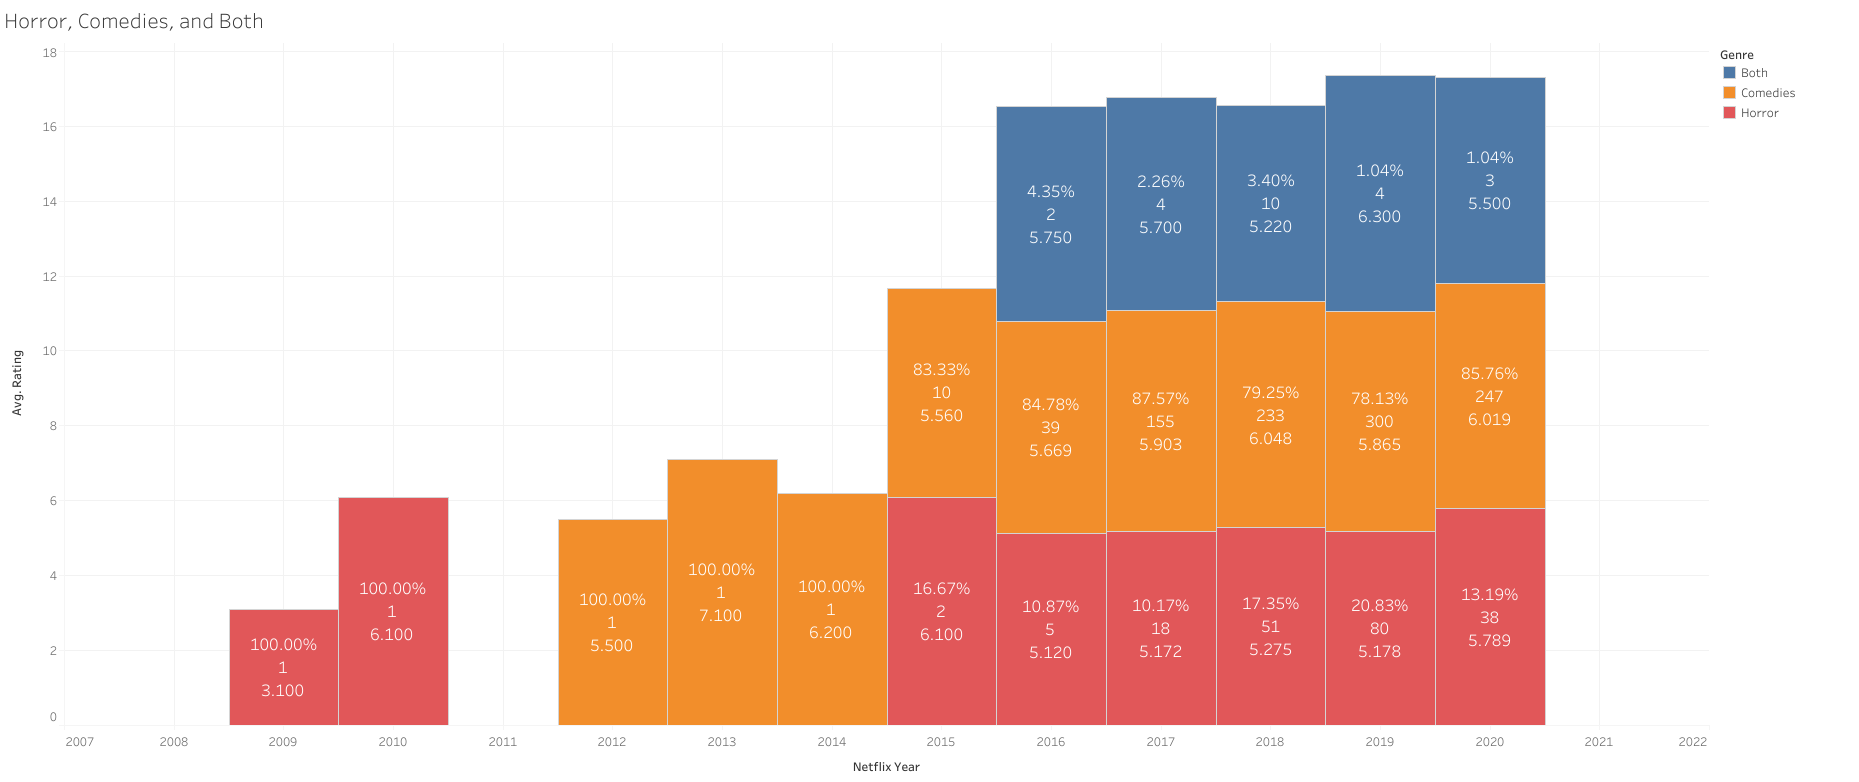

Here's a preview of the visualization which can also be interacted with [here](https://public.tableau.com/app/profile/kristian.abad/viz/NetflixMoviesProject/HorrorComediesSheet?publish=yes).

More about the individual bars:
*   The percentage is the percent of the total number of counts for a given year.
*   The second number is the movie count for that genre in a given year.
*   The third number is the average rating for that genre in a given year.

In terms of genres it looks like comedies has been dominating the counts and performs better than horror titles on average. I'm going to need to rewind a little bit and try to make simpler visualizations and see if there are some other relationships worth exploring. I think the biggest challenge right now is the genre feature has a lot of overlap and I'm wondering if the order of genre when a movie has multiple genres listed has any sort of relevance. The order of genre might say something but I definitely need to do more digging possibly in the API's documentation to find more information.

Actually it looks like the genres are sorted alphabetically in a given genre cell.

Going into this project there wasn't really a focus other than putting Tableau into practice but I think I have some questions that will help start this first project. Say you are deciding between keeping different streaming services and are wondering besides platform exclusives, what makes Netflix lucrative from a data driven standpoint?:

Tentative specific questions:
*   How are genres distributed? And by year?
*   What can be said about movies from other countries?
*   How recent does Netflix put in movies or equivalently what is the difference in year when movies are produced and entered into Netflix? What is the frequency of those differences?

Other questions possibly for a concluding discussion section
*   What does it's catalogue of movies have to offer?
*   What can be said about the quality of movies for Netflix customers?






Let's explore the data by genre a bit more ignoring genre overlap (i.e. having more than 1 genre for a given movie):

In [22]:
pd.set_option('max_rows', 10)

In [54]:
print('Action:',data[data.genre.str.contains('Action')].shape,
      '\nAnime:',data[data.genre.str.contains('Anime')].shape,
      '\nBlack:',data[data.genre.str.contains('Black')].shape,
      '\nChildren:',data[data.genre.str.contains('Children')].shape,
      '\nClassics:',data[data.genre.str.contains('Classics')].shape,
      '\nComedies:',data[data.genre.str.contains('Comedies')].shape,
      '\nCrime:',data[data.genre.str.contains('Crime')].shape,
      '\nCult:',data[data.genre.str.contains('Cult')].shape,
      '\nDocumentaries',data[data.genre.str.contains('Documentaries')].shape,
      '\nDramas:',data[data.genre.str.contains('Dramas')].shape,
      '\nFaith:',data[data.genre.str.contains('Faith')].shape,
      '\nSci-Fi & Fantasy:',data[data.genre.str.contains('Fantasy')].shape,
      '\nHorror:',data[data.genre.str.contains('Horror')].shape,
      '\nIndependent:',data[data.genre.str.contains('Independent')].shape,
      '\nInternational:',data[data.genre.str.contains('International')].shape,
      '\nLGBTQ:',data[data.genre.str.contains('LGBTQ')].shape,
      '\nMusic & Musicals:',data[data.genre.str.contains('Music')].shape,
      '\nRomance:',data[data.genre.str.contains('Romance')].shape,
      '\nShort:',data[data.genre.str.contains('Short')].shape,
      '\nSport:',data[data.genre.str.contains('Sport')].shape,
      '\nStand-Up Comedy:',data[data.genre.str.contains('Stand')].shape,
      '\nThriller:',data[data.genre.str.contains('Thriller')].shape
      )

Action: (488, 9) 
Anime: (49, 9) 
Black: (0, 9) 
Children: (289, 9) 
Classics: (0, 9) 
Comedies: (1010, 9) 
Crime: (0, 9) 
Cult: (41, 9) 
Documentaries (219, 9) 
Dramas: (1461, 9) 
Faith: (30, 9) 
Sci-Fi & Fantasy: (142, 9) 
Horror: (219, 9) 
Independent: (484, 9) 
International: (1665, 9) 
LGBTQ: (45, 9) 
Music & Musicals: (171, 9) 
Romance: (0, 9) 
Short: (0, 9) 
Sport: (100, 9) 
Stand-Up Comedy: (261, 9) 
Thriller: (332, 9)
